In [68]:
import warnings
warnings.filterwarnings("ignore")
warnings.resetwarnings()

#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import re

%matplotlib inline  

In [33]:
cov  = pd.read_csv("D:/s3/apprentisange/COVID/1_VAG1ERMRT__datavers0210.csv", sep=";", encoding="UTF-8", decimal=",", header=0)
co  = pd.read_csv("D:/s3/apprentisange/COVID/2_VAG1ERMRT__datavers0210-sectemploi.csv", sep=";", encoding="UTF-8", decimal=",", header=0)

In [34]:
co.head(2)

,US_ORDRE,A7,A1,A2,A3,A6_1,A6_2,STRATE,SEC,A8,...,E3E,E4A,E4B,ID2,NOM2,E4C,E4CAUTRE1,E4D,E4E,E5
0,2,3,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,complémentaires,توتو منت سالم,...,,0,,,,,,,,Diminnué
1,2,3,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,complémentaires,توتو منت سالم,...,,0,,,,,,,,Diminnué


In [35]:
cov.head(2)

,US_ORDRE,A7,A1,A2,A3,A6_1,A6_2,STRATE,SEC,A8,...,F7C,F7D,F7E,F7F,A16,A16H,A16M,heur_deb,heur_fin,durinterv
0,2,3,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,complémentaires,توتو منت سالم,...,NSP,Non,NSP,Non,1055,10,55,10:24:00,10:55:00,0:31:00
1,2,8,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,principale,مسعودة بنت محمد,...,NSP,Non,NSP,NSP,1312,13,12,13:11:00,13:12:00,0:01:00


In [36]:
cov.shape

(1204, 244)

In [37]:
# Create a new identifier column in both dataframes
cov['id_men'] = cov['A7'] + cov['US_ORDRE'] * 100
co['id_men'] = co['A7'] + co['US_ORDRE'] * 100

In [38]:
# Find columns in co but not in cov
cols_to_merge = co.columns.difference(cov.columns).tolist()

In [39]:
# Include 'id_men' in the selected columns
cols_to_merge.append('id_men')

In [40]:

# Create a dataframe with selected columns
cols = co[cols_to_merge]

In [41]:
# Merge cols with cov
covid = pd.merge(cov, cols, on='id_men')

In [42]:
# Drop 'US_ORDRE' and 'A7' columns
covid = covid.drop(['US_ORDRE', 'A7'], axis=1)

In [43]:
covid.head()

,A1,A2,A3,A6_1,A6_2,STRATE,SEC,A8,A8A,A8B,...,E4C,E4CAUTRE1,E4D,E4E,ID,ID1,ID2,NOM,NOM1,NOM2
0,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,complémentaires,توتو منت سالم,44015667.0,99999999,...,,,,,1,,,توتو,,
1,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,complémentaires,توتو منت سالم,44015667.0,99999999,...,,,,,2,,,محمد,,
2,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,complémentaires,توتو منت سالم,44015667.0,99999999,...,,,,,3,,,الطالب بوي,,
3,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,principale,الشيخ بوي ولد اعمر فال,22420172.0,99999999,...,,,,,1,,,خوه ولد النعمة,,
4,Hodh charghy,Amourj,Adel Bagrou,عدل بكرو,273,Autre zone urbaine,principale,الشيخ بوي ولد اعمر فال,22420172.0,99999999,...,,,,,2,,,اعمر فال,,


In [13]:
covid.shape

(1477, 259)

In [73]:
# List of selected columns
selected_columns = [ 'A1', 'A2', 'A3',"B22","B23",'C1A', 'C1B', 'C1C', 'C1D', 'C1E',
                    'C1F', 'C1G', 'C1H', 'C2A', 'C2B', 'C2C', 'C2D1', 'C2D2A', 'C2D2B', 'C2D2D', 'C2D2E', 'C2D2F',
                    'C2EA', 
                    # 'C2EB', 'C2EC', 'C2ED',
                    'D1A', 'D1B', 'D1C1',  'D2A', 'D2B', 'D2C', 'D2DA','D2DC','D2DD',
                    'D2DE','D2EA', 'D2EB', 'D2EC', 'D2ED', 'D2EE', 'D2EF', 'D2EG', 'D3A', 'D3B', 'D3C', 'D3D', 
                    'D3E', 'E1A', 'E1B', 'E1C', 'E1D', 'E2A',  "E2B",'E3A', 'E2C', 'E3C', 'E3D',  'E3E','E4C',
                    'E4D', 'E4E',  'E3B', 'E4A', 'E4B',  'E5', 'F1','F3', 'F4', 'F5', 'F2A','F2B','F6A', 'F6B', 
                    'F6C', 'F6D', 'F6E', 'F6F', 'F7A', 'F7B', 'F7C', 'F7D', 'F7E', 'F7F']

In [74]:
len(selected_columns)

81

In [153]:
# Create a new dataframe with selected columns
df = covid[selected_columns].copy()

# Data Cleaning and Preprocessing:


In [154]:
df.shape

(1477, 81)

In [155]:
column_mapping = {
    'A1': 'Wilaya',
    'A2': 'Moughataa',
    'A3': 'Commune',
    'B22': 'Sexe',
    'B23': 'Age'
}

In [156]:
df.rename(columns=column_mapping, inplace=True)

In [157]:
df.replace(' ', np.nan, inplace=True)

In [158]:
df.filter(regex=re.compile('^D1'))

,D1A,D1B,D1C1
0,Quantité et Qualité inférieure,E,Plus chers maintenant
1,Quantité et Qualité inférieure,E,Plus chers maintenant
2,Quantité et Qualité inférieure,E,Plus chers maintenant
3,Comme d'habitude,NaN,Plus chers maintenant
4,Comme d'habitude,NaN,Plus chers maintenant
...,...,...,...
1472,Quantité inférieure,A C,Plus chers maintenant
1473,Quantité inférieure,A C,Plus chers maintenant
1474,Quantité inférieure,A C,Plus chers maintenant
1475,Quantité inférieure,A C,Plus chers maintenant


In [159]:
# Here I want to remove leading and trailing spaces from all the columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [160]:
#here I want to remove all spaces within the string values
df = df.applymap(lambda x: ''.join(x.split()) if isinstance(x, str) else x)

In [161]:
df['C1C'] = df['C1C'].replace('Selaverlesmains', 'A')
df['C1F'] = df['C1F'].replace('Sensibilisationsurlesmesuresbarrières', 'A')
df['C1H'] = df['C1H'].replace('Sensibilisationsurlesmesuresbarrières', 'A')
df['C2B'] = df['C2B'].replace('Transfertd’argent(Cash)', 'A')
df['C2C'] = df['C2C'].replace('Etat', 'A')
df['D1B'] = df['D1B'].replace("Manqued'argent", 'A')
df['D2B'] = df['D2B'].replace('Pasdemalade', 'A')
df['D2C'] = df['D2C'].replace('Maladied’unmembre(AtteintduCOVID-19)', 'A')
df['D3C'] = df['D3C'].replace('Adomicile', 'A')
df['D3E'] = df['D3E'].replace('Compléterdesdevoirsimprimés,ycomprisceuxfournisparlesenseignants', 'A')
df['C1D'] = df['C1D'].replace('Selaverlesmains', 'A')

In [162]:
for cl in df.filter(regex=re.compile('^D')).columns:
    print(cl, df[cl].dropna().unique())

D1A ['QuantitéetQualitéinférieure' "Commed'habitude" 'Quantitésupérieure'
 'Quantitéinférieure' 'Qualitéinférieure' 'Quantitéetqualitésupérieures'
 'Qualitémeilleure']
D1B ['E' 'A' 'AC' 'F' 'C' 'AH' 'BC' 'AB' 'ACH' 'ABCG' 'H' 'AE' 'ABC' 'AF'
 'ACE' 'CE' 'B' 'ACEG' 'ABCE' 'CEF' 'ABCD' 'BCD' 'AD' 'AG' 'ABEF' 'CF'
 'EF' 'ABF' 'AEF' 'BE' 'AEH' 'ACEH' 'G' 'BF' 'ADE' 'ABE' 'FH' 'ACF']
D1C1 ['Pluschersmaintenant' 'Mêmeniveau' 'Moinschersmaintenant']
D2A ['Oui' 'Non']
D2B ['A' 'F' 'C' 'E' 'DE' 'BC' 'B' 'CD' 'CE' 'D' 'AC' 'AE']
D2C ['D' 'B' 'BD' 'G' 'E' 'A' 'CD' 'BF' 'C' 'BC' 'AB' 'F' 'BDE' 'BG' 'BE' 'AG']
D2DA ['Moyenne' 'Mauvaise' 'Bonne']
D2DC ['Bonne' 'Mauvaise' 'Moyenne']
D2DD ['Bonne' 'Mauvaise' 'Moyenne']
D2DE ['Bonne' 'Moyenne' 'Mauvaise']
D2EA ['Non' 'Oui']
D2EB ['Non' 'Oui']
D2EC ['Non' 'Oui']
D2ED ['Non' 'Oui']
D2EE ['Non' 'Oui']
D2EF ['Non' 'Oui']
D2EG ['Non' 'Oui']
D3A ['Oui' 'Non']
D3B ['Oui' 'Non']
D3C ['A' 'B' 'K' 'G' 'GH' 'AK' 'H' 'HI' 'CH' 'C' 'AH' 'I' 'AGH' 'CE' 'CG'
 'BGH' '

In [163]:
# I want to convert column 'C2D1' to integer type because it is an ammount of money

df['C2D1'] = df['C2D1'].fillna(0).astype(int)

In [164]:
df.shape

(1477, 81)

In [165]:
df.shape

(1477, 81)

# Exploratory Data Analysis (EDA):

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 0 to 1476
Data columns (total 81 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Wilaya     1477 non-null   object
 1   Moughataa  1477 non-null   object
 2   Commune    1477 non-null   object
 3   Sexe       1477 non-null   object
 4   Age        1477 non-null   int64 
 5   C1A        1477 non-null   object
 6   C1B        1476 non-null   object
 7   C1C        1476 non-null   object
 8   C1D        1435 non-null   object
 9   C1E        1476 non-null   object
 10  C1F        596 non-null    object
 11  C1G        1476 non-null   object
 12  C1H        803 non-null    object
 13  C2A        1477 non-null   object
 14  C2B        402 non-null    object
 15  C2C        402 non-null    object
 16  C2D1       1477 non-null   int32 
 17  C2D2A      192 non-null    object
 18  C2D2B      192 non-null    object
 19  C2D2D      192 non-null    object
 20  C2D2E      192 non-null    obj

In [188]:
df.describe().T

C:\Users\abben\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\nanops.py:1723: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  return np.percentile(values, q, axis=1, interpolation=interpolation)


,count,mean,std,min,25%,50%,75%,max
Age,1477.0,44.653351,13.914093,18.0,35.0,43.0,53.0,93.0
C2D1,1477.0,4935.727827,14904.397850,0.0,0.0,0.0,0.0,225000.0


In [119]:
# Numerical columns
numerical_columns = df.select_dtypes(include=['int64']).columns

# Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns


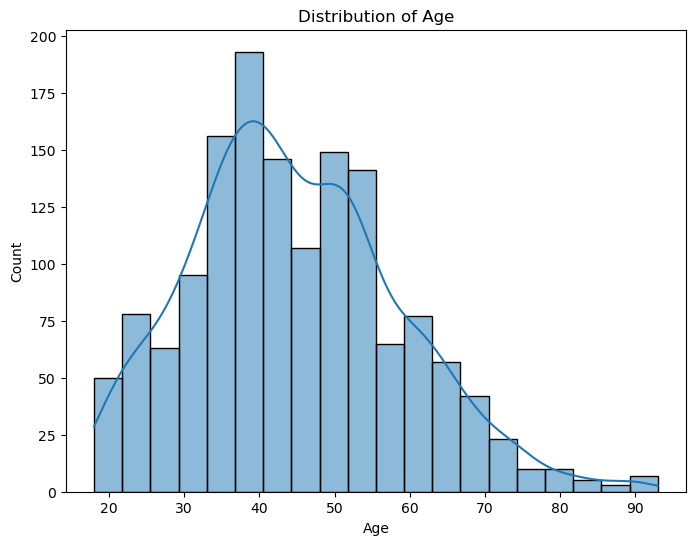

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title(f'Distribution of Age')
plt.show()

In [121]:
df.columns

Index(['Wilaya', 'Moughataa', 'Commune', 'Sexe', 'Age', 'C1A', 'C1B', 'C1C',
       'C1D', 'C1E', 'C1F', 'C1G', 'C1H', 'C2A', 'C2B', 'C2C', 'C2D1', 'C2D2A',
       'C2D2B', 'C2D2D', 'C2D2E', 'C2D2F', 'C2EA', 'D1A', 'D1B', 'D1C1', 'D2A',
       'D2B', 'D2C', 'D2DA', 'D2DC', 'D2DD', 'D2DE', 'D2EA', 'D2EB', 'D2EC',
       'D2ED', 'D2EE', 'D2EF', 'D2EG', 'D3A', 'D3B', 'D3C', 'D3D', 'D3E',
       'E1A', 'E1B', 'E1C', 'E1D', 'E2A', 'E2B', 'E3A', 'E2C', 'E3C', 'E3D',
       'E3E', 'E4C', 'E4D', 'E4E', 'E3B', 'E4A', 'E4B', 'E5', 'F1', 'F3', 'F4',
       'F5', 'F2A', 'F2B', 'F6A', 'F6B', 'F6C', 'F6D', 'F6E', 'F6F', 'F7A',
       'F7B', 'F7C', 'F7D', 'F7E', 'F7F'],
      dtype='object')

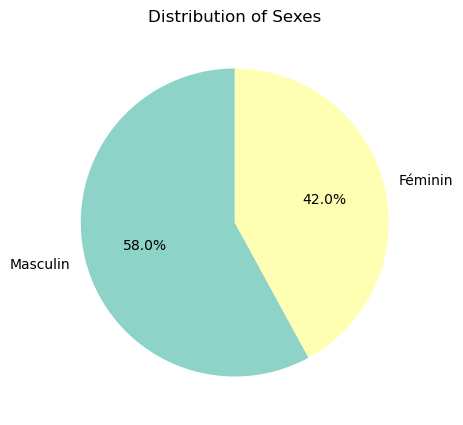

In [135]:
plt.figure(figsize=(5, 5))
sex_counts = df['Sexe'].value_counts()

# Plotting the pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.title('Distribution of Sexes')
plt.show()

## CONNAISSSANCE DE LA COVID-19 ET PREVENTION

In [189]:
df['C1C']

0       ACDEI
1       ACDEI
2       ACDEI
3         ACH
4         ACH
        ...  
1472     ADGH
1473     ADGH
1474      ADF
1475      ACG
1476    ABCGH
Name: C1C, Length: 1477, dtype: object

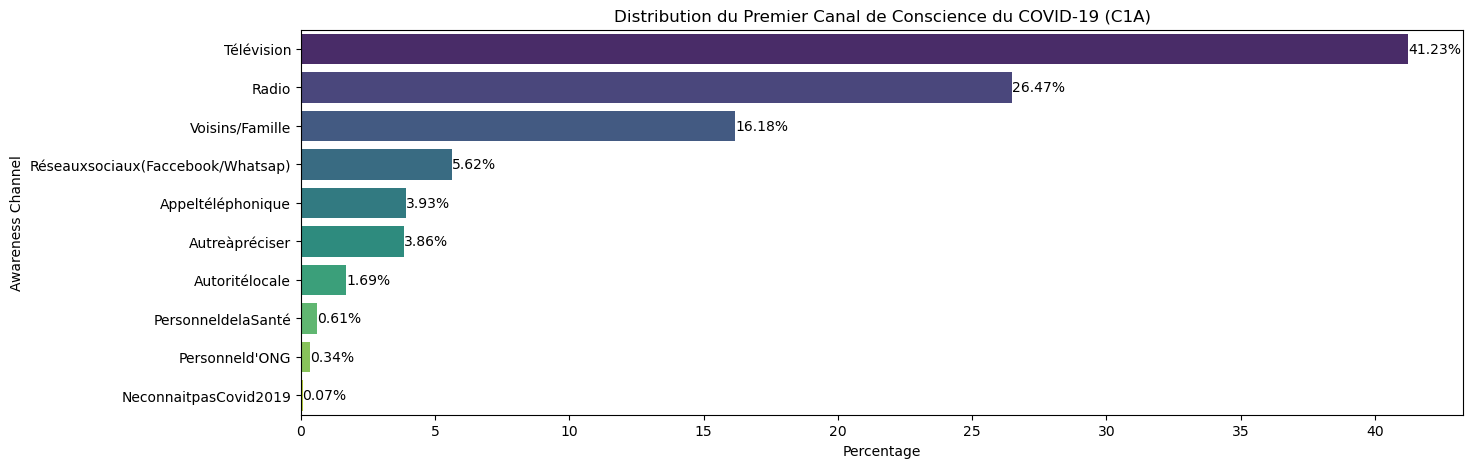

In [187]:
plt.figure(figsize=(15, 5))

# Calculate percentage values
percentage_values = df['C1A'].value_counts(normalize=True) * 100

# Create a horizontal bar plot
sns.barplot(x=percentage_values, y=percentage_values.index, palette='viridis')

# Adding percentages on the bars
for index, value in enumerate(percentage_values):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.title('Distribution du Premier Canal de Conscience du COVID-19 (C1A)')
plt.xlabel('Percentage')
plt.ylabel('Awareness Channel')
plt.show()


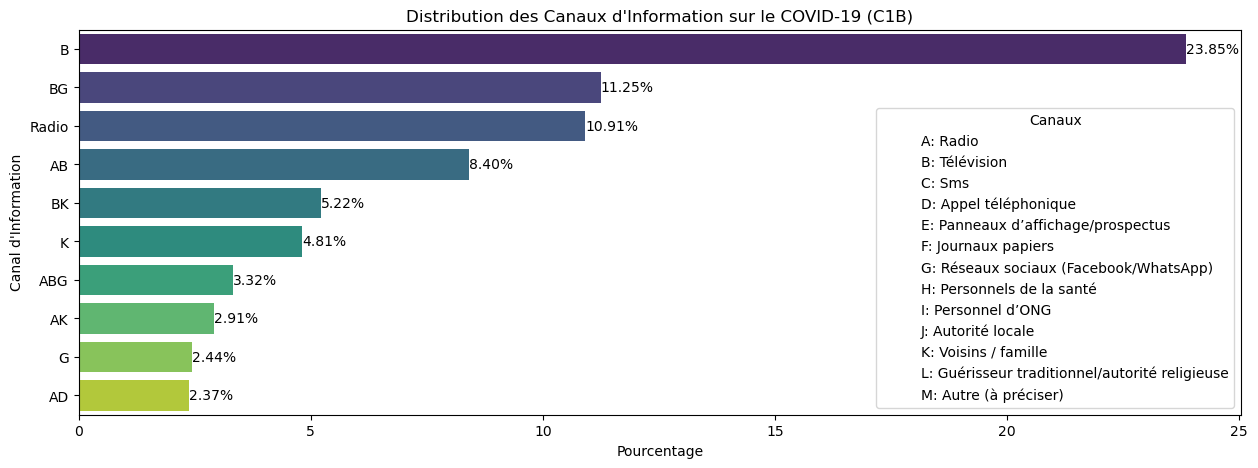

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping between codes and their meanings
channels_mapping = {
    'A': 'Radio', 'B': 'Télévision','C': 'Sms','D': 'Appel téléphonique','E': 'Panneaux d’affichage/prospectus','F': 'Journaux papiers','G': 'Réseaux sociaux (Facebook/WhatsApp)',
    'H': 'Personnels de la santé','I': 'Personnel d’ONG','J': 'Autorité locale', 'K': 'Voisins / famille', 'L': 'Guérisseur traditionnel/autorité religieuse','M': 'Autre (à préciser)'}

plt.figure(figsize=(15, 5))

# Calculate percentage values
percentage_values_C1B = df['C1B'].value_counts(normalize=True) * 100

# Select only the top 7 channels
top_channels = percentage_values_C1B.head(10)

# Define smaller bar width
bar_width = 0.4

# Create a horizontal bar plot with smaller bar width
sns.barplot(x=top_channels, y=top_channels.index, palette='viridis', errorbar=None, dodge=True, saturation=0.75)

# Adding percentages on the bars
for index, value in enumerate(top_channels):
    plt.text(value, index, f'{value:.2f}%', va='center')

# Adding legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {channel}')
           for code, channel in channels_mapping.items()]
plt.legend(handles=handles, title='Canaux', loc='lower right')

plt.title('Distribution des Canaux d\'Information sur le COVID-19 (C1B)')
plt.xlabel('Pourcentage')
plt.ylabel('Canal d\'Information')
plt.show()


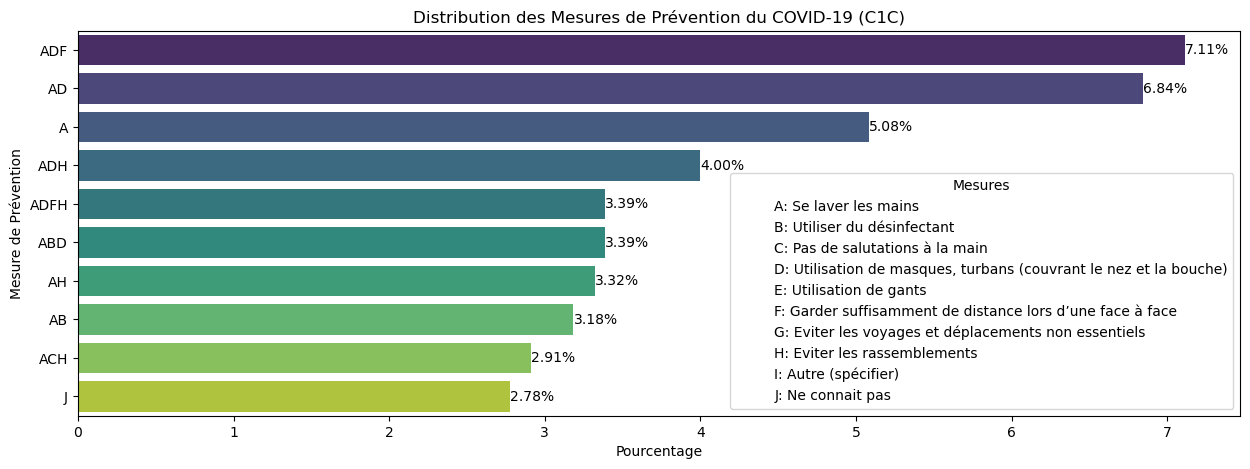

In [195]:
measures_mapping = {
    'A': 'Se laver les mains','B': 'Utiliser du désinfectant','C': 'Pas de salutations à la main', 'D': 'Utilisation de masques, turbans (couvrant le nez et la bouche)', 'E': 'Utilisation de gants',
    'F': 'Garder suffisamment de distance lors d’une face à face', 'G': 'Eviter les voyages et déplacements non essentiels','H': 'Eviter les rassemblements','I': 'Autre (spécifier)',  'J': 'Ne connait pas'}

plt.figure(figsize=(15, 5))

# Calculate percentage values
percentage_values_C1C = df['C1C'].value_counts(normalize=True) * 100

# Select only the top 7 measures
top_measures = percentage_values_C1C.head(10)

# Create a horizontal bar plot with smaller bar width
sns.barplot(x=top_measures, y=top_measures.index, palette='viridis', errorbar=None, saturation=0.7)

# Adding percentages on the bars
for index, value in enumerate(top_measures):
    plt.text(value, index, f'{value:.2f}%', va='center')

# Adding legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {measure}')
           for code, measure in measures_mapping.items()]
plt.legend(handles=handles, title='Mesures', loc='lower right')

plt.title('Distribution des Mesures de Prévention du COVID-19 (C1C)')
plt.xlabel('Pourcentage')
plt.ylabel('Mesure de Prévention')
plt.show()


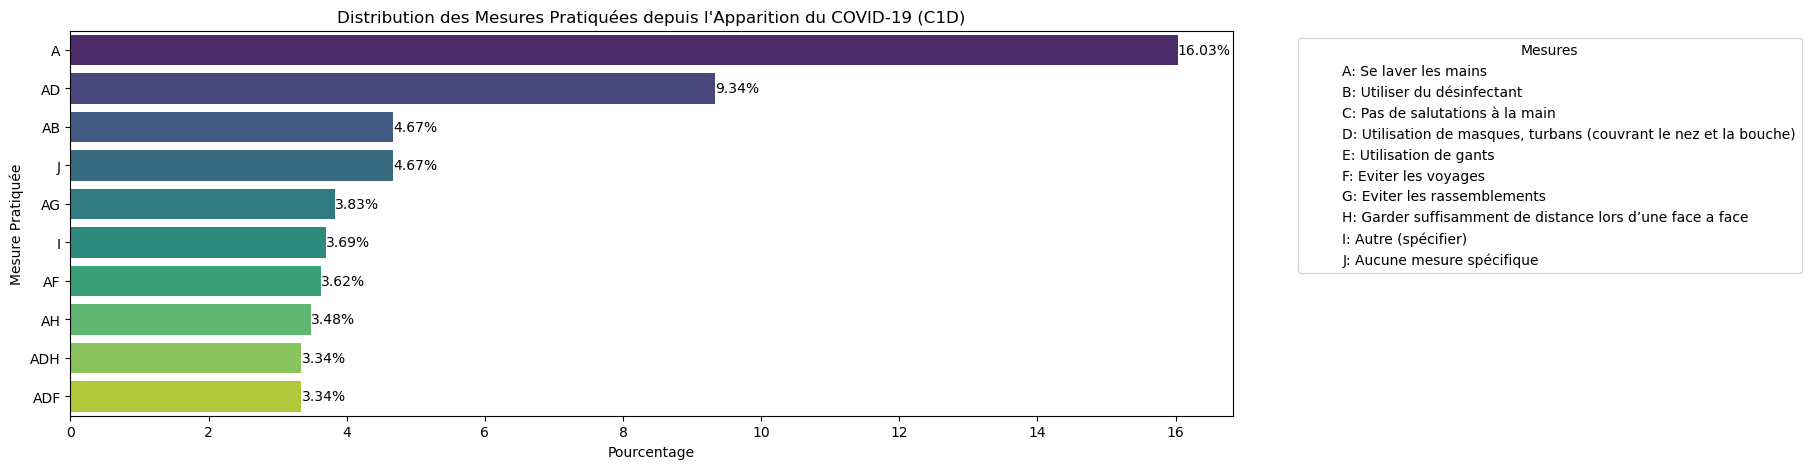

In [199]:

measures_mapping = {'A': 'Se laver les mains', 'B': 'Utiliser du désinfectant', 'C': 'Pas de salutations à la main',
                    'D': 'Utilisation de masques, turbans (couvrant le nez et la bouche)', 'E': 'Utilisation de gants',
                    'F': 'Eviter les voyages', 'G': 'Eviter les rassemblements',
                    'H': 'Garder suffisamment de distance lors d’une face a face', 'I': 'Autre (spécifier)',
                    'J': 'Aucune mesure spécifique'}

plt.figure(figsize=(15, 5))

# Calculate percentage values
percentage_values_C1D = df['C1D'].value_counts(normalize=True) * 100

# Select only the top 7 measures
top_measures = percentage_values_C1D.head(10)

# Define smaller bar width
bar_width = 0.4

# Create a horizontal bar plot with smaller bar width
sns.barplot(x=top_measures, y=top_measures.index, palette='viridis', errorbar=None, dodge=True, saturation=0.75)

# Adding percentages on the bars
for index, value in enumerate(top_measures):
    plt.text(value, index, f'{value:.2f}%', va='center')

# Adding legend in a horizontal way
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {measure}') for code, measure in measures_mapping.items()]
plt.legend(handles=handles, title='Mesures', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution des Mesures Pratiquées depuis l\'Apparition du COVID-19 (C1D)')
plt.xlabel('Pourcentage')
plt.ylabel('Mesure Pratiquée')
plt.show()


In [201]:
df['C1F']

0         A
1         A
2         A
3        AB
4        AB
       ... 
1472     AC
1473     AC
1474    NaN
1475    NaN
1476    NaN
Name: C1F, Length: 1477, dtype: object

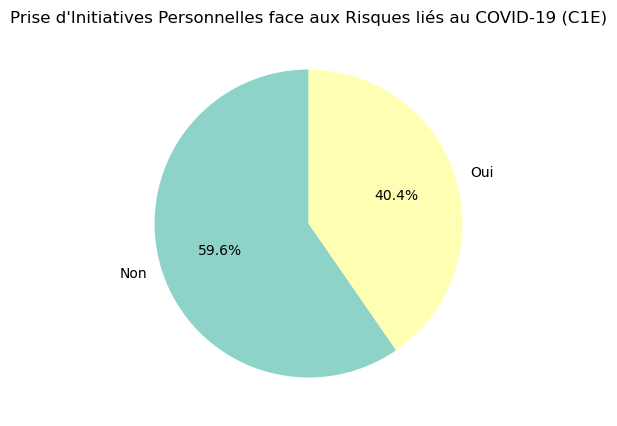

In [204]:
plt.figure(figsize=(5, 5))
initia = df['C1E'].value_counts()

# Plotting the pie chart
plt.pie(initia, labels=initia.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.title('Prise d\'Initiatives Personnelles face aux Risques liés au COVID-19 (C1E)')
plt.show()

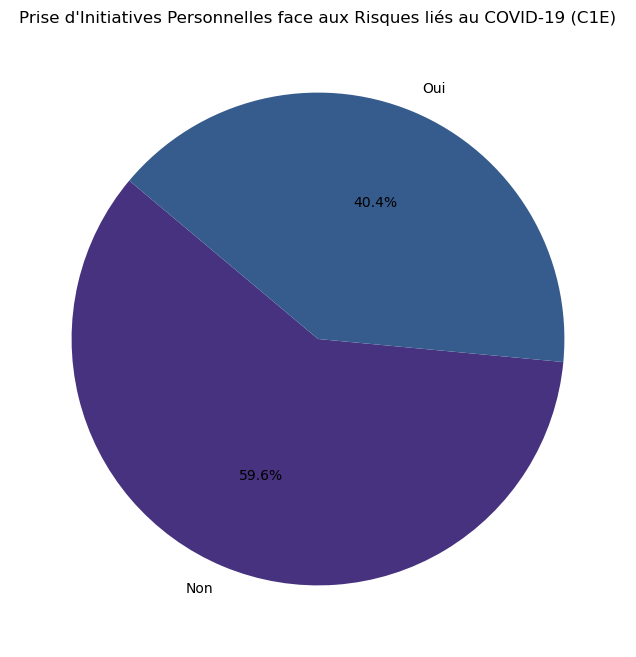

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(8, 8))

# Calculate percentage values
percentage_values_C1E = df['C1E'].value_counts(normalize=True) * 100

# Create a pie chart
plt.pie(percentage_values_C1E, labels=percentage_values_C1E.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))


plt.title('Prise d\'Initiatives Personnelles face aux Risques liés au COVID-19 (C1E)')
plt.show()


## Health

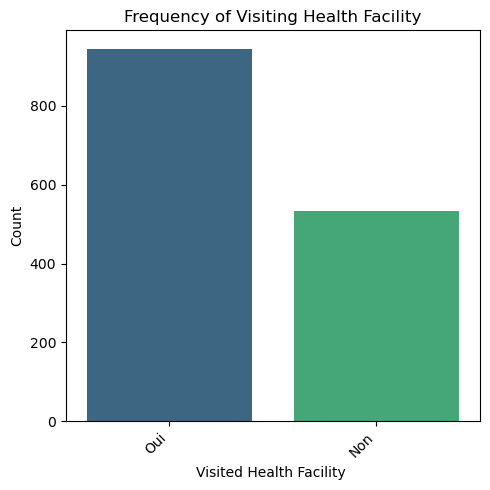

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x='D2A', data=df, palette='viridis')
plt.title('Frequency of Visiting Health Facility')
plt.xlabel('Visited Health Facility ')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


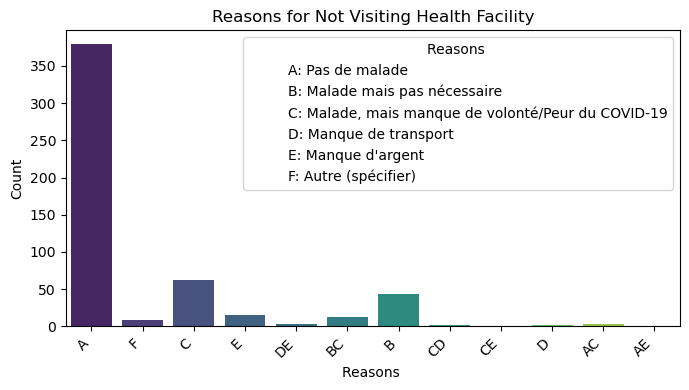

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping between codes and their meanings
reasons_mapping = {
    'A': 'Pas de malade',
    'B': 'Malade mais pas nécessaire',
    'C': 'Malade, mais manque de volonté/Peur du COVID-19',
    'D': 'Manque de transport',
    'E': "Manque d'argent",
    'F': 'Autre (spécifier)'
}


plt.figure(figsize=(7, 4))
sns.countplot(x='D2B', data=df, palette='viridis')

# Adding legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {reason}')
           for code, reason in reasons_mapping.items()]
plt.legend(handles=handles, title='Reasons ', loc='upper right')

plt.title('Reasons for Not Visiting Health Facility')
plt.xlabel('Reasons ')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()


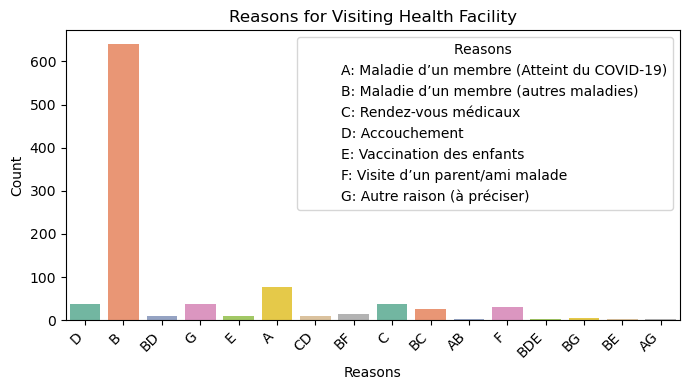

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping between codes and their meanings
reasons_mapping_d2c = {
    'A': 'Maladie d’un membre (Atteint du COVID-19)',
    'B': 'Maladie d’un membre (autres maladies)',
    'C': 'Rendez-vous médicaux',
    'D': 'Accouchement',
    'E': 'Vaccination des enfants',
    'F': 'Visite d’un parent/ami malade',
    'G': 'Autre raison (à préciser)'
}


plt.figure(figsize=(7, 4))
sns.countplot(x='D2C', data=df, palette='Set2')

# Adding legend
handles_d2c = [plt.Line2D([0], [0], marker='o', color='w', label=f'{code}: {reason}')
               for code, reason in reasons_mapping_d2c.items()]
plt.legend(handles=handles_d2c, title='Reasons ', loc='upper right')

plt.title('Reasons for Visiting Health Facility')
plt.xlabel('Reasons')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()


# Feature Engineering:

# Data Splitting

# Model Creation

# Model Training

# Model Evaluation

# Model Interpretation